In [1]:
%matplotlib inline


# Classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


Automatically created module for IPython interactive environment
Nearest Neighbors: Accuracy Score: 0.06184210526315789
Nearest Neighbors: Precession Score: 0.004985844240230204
Nearest Neighbors: Recall Score: 0.005216047577158689
Nearest Neighbors: F1 Score: 0.004087870291573995


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.6/site-packages/ipykernel/__ma

Linear SVM: Accuracy Score: 0.09736842105263158
Linear SVM: Precession Score: 0.0005241758397438622
Linear SVM: Recall Score: 0.005376344086021506
Linear SVM: F1 Score: 0.000955220797996618
RBF SVM: Accuracy Score: 0.09736842105263158
RBF SVM: Precession Score: 0.0007913279185336998
RBF SVM: Recall Score: 0.005559707172610398
RBF SVM: F1 Score: 0.001385272423140586


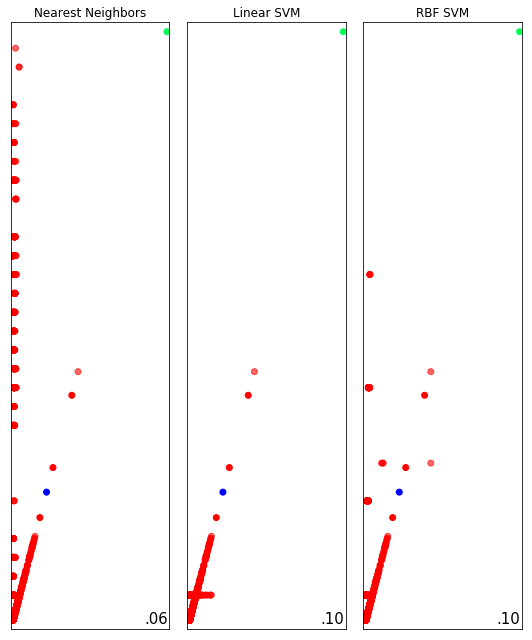

In [3]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=11, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

file = "/Users/jwalker/Documents/Altmetrics research/data2.csv";

df=pd.read_csv(file, sep=',',header=None)

X = df.values

X = np.delete(X, 0, 0)

X = np.delete(X, 0, 1)

data = PCA(n_components=1).fit_transform(X[:, 0:11])

data = np.column_stack((data, X[:,12]))

figure = plt.figure(figsize=(27, 9))
i = 1
# preprocess dataset, split into training and test part
#X, y = ds
X = data[:, 0]
y = data[:, 1]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X.min() - .5, X.max() + .5
y_min, y_max = X.min() - .5, X.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF59'])
#ax = plt.subplot(1, len(classifiers) + 1, i)
# Plot the training points
#ax.scatter(X_train, X_train, c=y_train, cmap=cm_bright)
# and testing points
#ax.scatter(X_test, X_test, c=y_test, cmap=cm_bright, alpha=0.6)
#ax.set_xlim(xx.min(), xx.max())
#ax.set_ylim(yy.min(), yy.max())
#ax.set_xticks(())
#ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
    score = clf.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))
    y_pdct = clf.predict(X_test.reshape(-1, 1))

    

    # Plot also the training points
    ax.scatter(X_train, X_train, c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test, X_test, c=y_test, cmap=cm_bright,
               alpha=0.6)
    ax.scatter(X_test, y_pdct, c=y_pdct, cmap=cm_bright,
               alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1
    
    print('{}: Accuracy Score: {}'.format(name, accuracy_score(y_test, y_pdct)))
    print('{}: Precession Score: {}'.format(name, precision_score(y_test, y_pdct, average='macro')))
    print('{}: Recall Score: {}'.format(name, recall_score(y_test, y_pdct, average='macro')))
    print('{}: F1 Score: {}'.format(name, f1_score(y_test, y_pdct, average='macro')))

plt.tight_layout()
plt.show()